In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
TRAIN_FILE = 'data/train.tsv'
# TRAIN_FILE = 'data/test_kaggle.tsv'

In [122]:
df = pd.read_csv(TRAIN_FILE,sep='\t')
df.shape

(114993, 4)

In [123]:
df.columns

Index(['gold_label', 'premise', 'hypothesis', 'language'], dtype='object')

In [124]:
df.head()

,gold_label,premise,hypothesis,language
0,neutral,"At ground level, the asymmetrical cathedral is...",It's hard to find a dramatic view of the cathe...,en
1,contradiction,Hanuman is a beneficent deity predating classi...,Hanuman declared that all the lemurs here need...,en
2,contradiction,All other spending as well as federal revenue ...,None of the federal spending is assumed to grow,en
3,neutral,uh-huh that's interesting well it sounds as th...,That information about graduation rates is int...,en
4,neutral,Some kind of instant recognition on his father...,Did his father recognize him?,en


In [125]:
df[df.premise.isnull() == True]

,gold_label,premise,hypothesis,language


In [127]:
df[df.language == 'bg']

,gold_label,premise,hypothesis,language
104993,contradiction,"Но изведнъж бяхме извикани навън, за да видим ...",Казаха ни да не гледаме навън.,bg
104994,neutral,"Релахо може да опише и шеговита връзка, загадъ...",Relajo се шегува за икономиката.,bg
104995,contradiction,Надявам се най-сетне Ваша Светлост да започне ...,Негова Светлост просто прие съвета ми и предпр...,bg
104996,contradiction,Днес терминът барбакоа се използва само за озн...,Терминът барбакоа се използва за печене на зел...,bg
104997,contradiction,Няма разлика между по-младите и по-възрастните...,Млади и стари съученици имат различни резултат...,bg
...,...,...,...,...
105988,neutral,но от друга страна сме изяли много миещи мечки...,Опитвал съм месо от най-различни животни.,bg
105989,contradiction,"но не, ние обикновено сме с пола и блуза или к...","Все още нося рокли, когато работя у дома, защо...",bg
105990,contradiction,Няма да избухне без спусъка.,Няма спусък за натискане.,bg
105991,neutral,Трябваше да започна да тренирам в курса.,Трябваше да се науча как да завърша пътя с пре...,bg


In [126]:
df.language.value_counts()

en    100993
vi      1000
de      1000
ar      1000
es      1000
bg      1000
el      1000
th      1000
ru      1000
tr      1000
sw      1000
ur      1000
zh      1000
hi      1000
fr      1000
Name: language, dtype: int64

<AxesSubplot:xlabel='gold_label', ylabel='Count'>

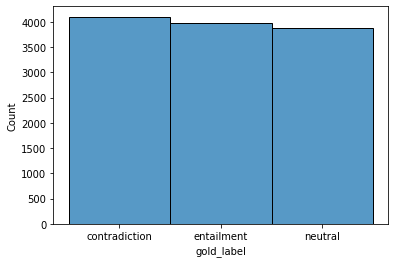

In [93]:
sns.histplot(df.gold_label)

In [96]:
df_hr = df[df.language == 'en']
df_lr = df[df.language != 'en']

<AxesSubplot:>

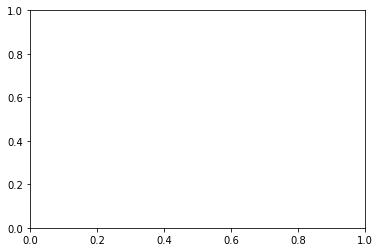

In [97]:
sns.histplot(df_hr.gold_label)

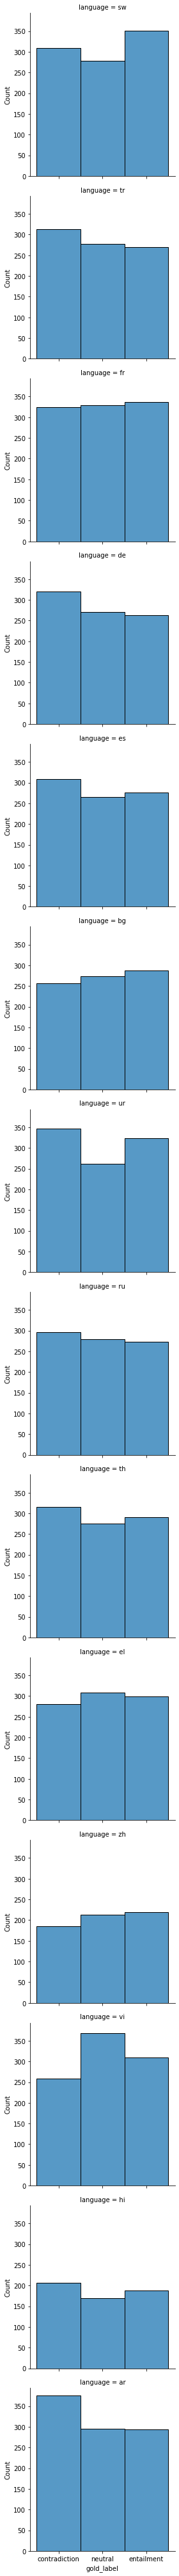

In [98]:
g = sns.FacetGrid(df_lr, row="language", height=4)
g.map(sns.histplot, "gold_label")

In [75]:
df = pd.read_csv('data/extra/back_translation_all.csv')

In [76]:
df

,id,premise,hypothesis,lang_abv,language,label
0,cd1f2cb2c7,Alibishana juu ya nani alikuwa mdogo na ni nan...,Wote walikubaliana kuwa watafanya kazi katika ...,sw,Swahili,2
1,6e066679e1,Ve onlar Augusta bölgesinde kalamazlardı çünkü...,İnsanlar beyaz olmadıklarının farkındaydı.,tr,Turkish,0
2,dfd570c177,"Alors, Shannon a pris le logarithme du volume ...",Shannon a jugé que le message venait d'une sou...,fr,French,1
3,e7104d56ea,"äh ja, und ich würde sagen, äh, ich werde wegf...",Ich würde I'll Fly Away wählen.,de,German,0
4,9aac706111,Louisa May Alcott y Nathaniel Hawthorne viven ...,Hawthorne vive en Pinckney Street.,es,Spanish,0
...,...,...,...,...,...,...
11941,2e41a9d211,"В полиции сообщили, что они исключили из числа...",Есть достаточно доказательств для ареста едино...,ru,Russian,2
11942,2632b516d3,माता-पिता के बारे में न्यूज़वीक कवर पैकेज |,माता-पिता के संबंध में न्यूज़वीक का विपणन लक्ष...,hi,Hindi,0
11943,6a6dbe192e,سونجا باچا اپنی بیٹی کے تانم کی نقل کرتی ہے۔,کوئی رو رہا تھا,ur,Urdu,2
11944,7689a6d56c,"Άλλοι απάντησαν στην ερώτηση, αλλά ο Keys κοκτέιλ",Οι Keys δεν απάντησαν σε αυτήν την ερώτηση.,el,Greek,2


In [77]:
label = {
    0: 'entailment',
    1: 'neutral',
    2: 'contradiction'
}

In [78]:
df['label'] = df.label.map(lambda x: label[x])
df['gold_label'] = df['label']
df['language'] = df['lang_abv']
df = df[['gold_label', 'premise', 'hypothesis', 'language']]
df

,gold_label,premise,hypothesis,language
0,contradiction,Alibishana juu ya nani alikuwa mdogo na ni nan...,Wote walikubaliana kuwa watafanya kazi katika ...,sw
1,entailment,Ve onlar Augusta bölgesinde kalamazlardı çünkü...,İnsanlar beyaz olmadıklarının farkındaydı.,tr
2,neutral,"Alors, Shannon a pris le logarithme du volume ...",Shannon a jugé que le message venait d'une sou...,fr
3,entailment,"äh ja, und ich würde sagen, äh, ich werde wegf...",Ich würde I'll Fly Away wählen.,de
4,entailment,Louisa May Alcott y Nathaniel Hawthorne viven ...,Hawthorne vive en Pinckney Street.,es
...,...,...,...,...
11941,contradiction,"В полиции сообщили, что они исключили из числа...",Есть достаточно доказательств для ареста едино...,ru
11942,entailment,माता-पिता के बारे में न्यूज़वीक कवर पैकेज |,माता-पिता के संबंध में न्यूज़वीक का विपणन लक्ष...,hi
11943,contradiction,سونجا باچا اپنی بیٹی کے تانم کی نقل کرتی ہے۔,کوئی رو رہا تھا,ur
11944,contradiction,"Άλλοι απάντησαν στην ερώτηση, αλλά ο Keys κοκτέιλ",Οι Keys δεν απάντησαν σε αυτήν την ερώτηση.,el


In [79]:
df.to_csv('data/test_kaggle_trans.tsv', sep = '\t', index=False)